## Simplilearn test data try.

### Prediction Linear Regression

In [1]:
import os, pandas as pd,numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,confusion_matrix,classification_report

%matplotlib inline

C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
C:\ProgramData\Anaconda3\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


In [21]:
companies = pd.read_csv("..\\data\\1000_Companies.csv")

In [22]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
companies['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [24]:
companies.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,81668.927200,122963.897612,226205.058419,119546.164656
std,46537.567891,12613.927535,91578.393542,42888.633848
min,0.000000,51283.140000,0.000000,14681.400000
25%,43084.500000,116640.684850,150969.584600,85943.198543
50%,79936.000000,122421.612150,224517.887350,117641.466300
75%,124565.500000,129139.118000,308189.808525,155577.107425
max,165349.200000,321652.140000,471784.100000,476485.430000


In [25]:
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
R&D Spend          1000 non-null float64
Administration     1000 non-null float64
Marketing Spend    1000 non-null float64
State              1000 non-null object
Profit             1000 non-null float64
dtypes: float64(4), object(1)
memory usage: 39.1+ KB


In [26]:
state_mapping={x:y for y,x in enumerate(companies['State'].unique())}

In [27]:
state_mapping

{'New York': 0, 'California': 1, 'Florida': 2}

In [28]:
companies['State'].map(state_mapping).astype(int).head()

0    0
1    1
2    2
3    0
4    2
Name: State, dtype: int32

In [29]:
companies['State']=companies['State'].map(state_mapping).astype(int)

In [30]:
companies.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,0,192261.83
1,162597.70,151377.59,443898.53,1,191792.06
2,153441.51,101145.55,407934.54,2,191050.39
3,144372.41,118671.85,383199.62,0,182901.99
4,142107.34,91391.77,366168.42,2,166187.94


In [31]:
companies.corr()

,R&D Spend,Administration,Marketing Spend,State,Profit
R&D Spend,1.000000,0.582434,0.978407,0.026450,0.945245
Administration,0.582434,1.000000,0.520465,0.000870,0.741560
Marketing Spend,0.978407,0.520465,1.000000,0.034363,0.917270
State,0.026450,0.000870,0.034363,1.000000,0.016969
Profit,0.945245,0.741560,0.917270,0.016969,1.000000


In [32]:
sns.set()

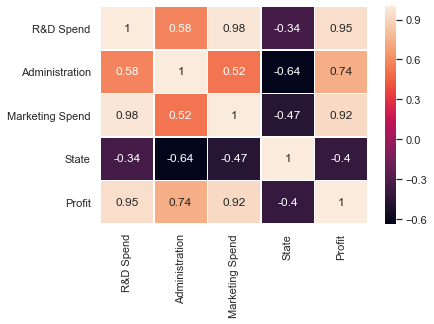

In [15]:
sns.heatmap(data=companies.corr(),annot=True,linewidths=.5)

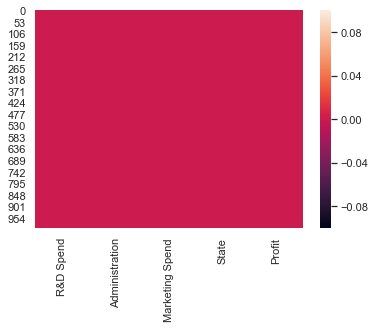

In [33]:
sns.heatmap(data=companies.isnull())

In [41]:
X = companies.drop('Profit',axis=1)
y = companies['Profit']

#### Splitting Train and Test set data

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

#### Fitting train set into Linear Regression Model.

In [42]:
from sklearn.linear_model import LinearRegression

In [43]:
ln_regressor = LinearRegression()

In [45]:
ln_regressor.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### predicting the test set into created linear model

In [48]:
ln_y_pred = ln_regressor.predict(X_test)

In [49]:
ln_y_pred[0:5]

array([ 88956.38438669,  87590.22026625,  94070.25716803, 175777.30672827,
        83381.38565772])

In [50]:
# Calculation the coefficients
print(ln_regressor.coef_)

[ 5.27204723e-01  9.79862943e-01  9.73556923e-02 -1.16635154e+02]


In [51]:
# Calculate the Intercept 
print(ln_regressor.intercept_)

-66091.03466589635


In [52]:
# Calculating the R squared value
r2_score(y_test,ln_y_pred)


0.9313255651413707

### Prediction Logistic Regression

In [4]:
import os, pandas as pd,numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,confusion_matrix,classification_report

%matplotlib inline

##### Lets do the logistic regression with Titanic data set

In [13]:
titanic_train=pd.read_csv('..\\data\\titanic\\train.csv')
titanic_test=pd.read_csv('..\\data\\titanic\\test.csv')

In [14]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [16]:
titanic_test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [23]:
set(titanic_train.columns)  - set(titanic_test.columns)

{'Survived'}

In [24]:
titanic_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [25]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [27]:
sns.set()
sns.set_style("whitegrid")

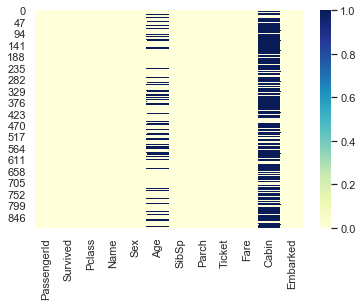

In [28]:
sns.heatmap(data=titanic_train.isnull(),cmap="YlGnBu")

In [31]:
titanic_train.groupby('Survived').size()

Survived
0    549
1    342
dtype: int64

In [32]:
titanic_train.groupby(['Survived','Sex']).size()

Survived  Sex   
0         female     81
          male      468
1         female    233
          male      109
dtype: int64

In [33]:
titanic_train.groupby(['Survived','Pclass']).size()

Survived  Pclass
0         1          80
          2          97
          3         372
1         1         136
          2          87
          3         119
dtype: int64

In [34]:
titanic_train.groupby(['Survived','Sex','Pclass']).size()

Survived  Sex     Pclass
0         female  1           3
                  2           6
                  3          72
          male    1          77
                  2          91
                  3         300
1         female  1          91
                  2          70
                  3          72
          male    1          45
                  2          17
                  3          47
dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in greater
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:447: RuntimeWarning: invalid value encountered in less
  X = X[np.logical_and(X > clip[0], X < clip[1])] # won't work for two columns.


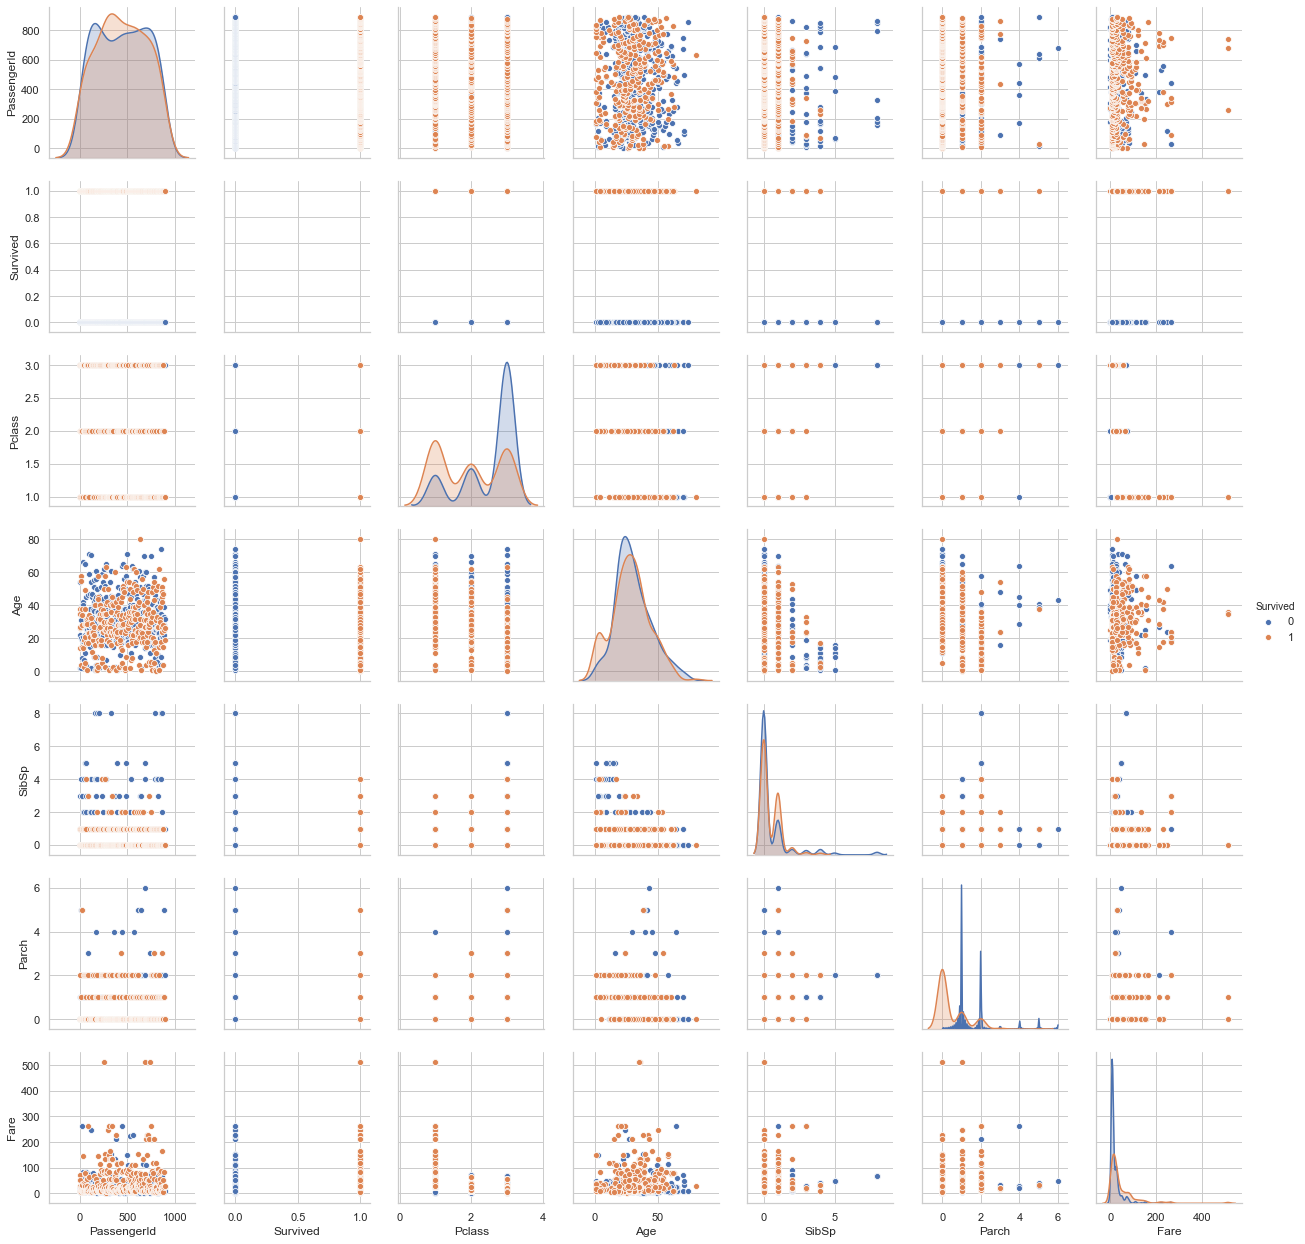

In [35]:
sns.pairplot(titanic_train,hue='Survived')

##### Lets find and fill the Age for the missing one 



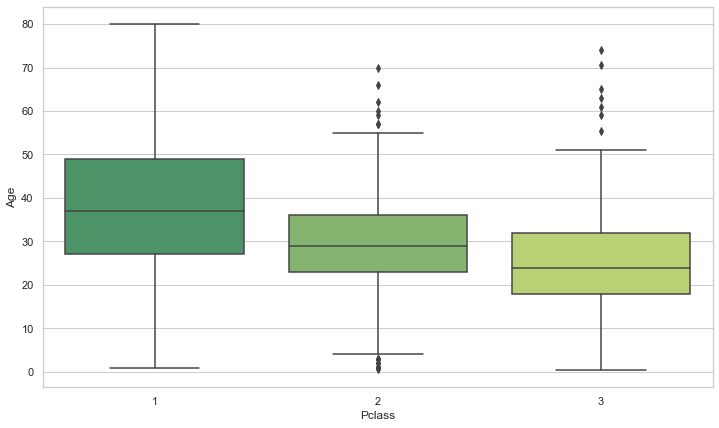

In [36]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Pclass',y='Age', data=titanic_train,palette='summer')

In [40]:
titanic_train[['Pclass','Age']].groupby(['Pclass']).mean().round()

,Age
Pclass,
1,38.0
2,30.0
3,25.0


###### Function to set the mean age for missing.

In [43]:
def give_them_age(col):
    pclass=col[0]
    age=col[1]
    if pd.isnull(age):
        if pclass == 1:
            return 38
        elif pclass == 2:
            return 30
        else:
            return 25
    else:
        return age

In [47]:
titanic_train['Age']=titanic_train[['Pclass','Age']].apply(give_them_age,axis=1)

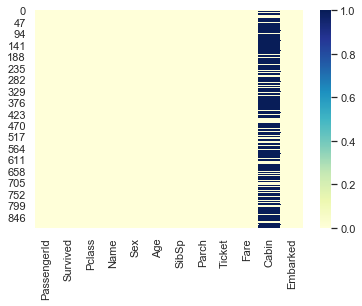

In [48]:
sns.heatmap(data=titanic_train.isnull(),cmap="YlGnBu")

In [49]:
### We can remove cabin from data as NAN exists vast in number
titanic_train=titanic_train.drop('Cabin',axis=1)

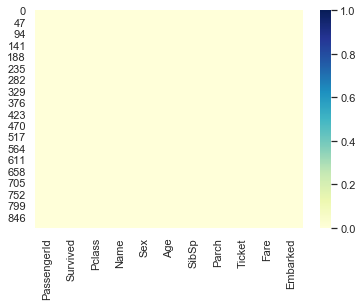

In [50]:
sns.heatmap(data=titanic_train.isnull(),cmap="YlGnBu")

In [51]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [60]:
def get_label_name(name):
    return name.split(',')[1].split('.')[0].strip()

In [61]:
titanic_train['Name'].apply(get_label_name).unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [63]:
titanic_train['Name'][titanic_train['Name'].str.contains('Jonkheer')]

822    Reuchlin, Jonkheer. John George
Name: Name, dtype: object

In [64]:
titanic_train['Label']=titanic_train['Name'].apply(get_label_name)

In [65]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Label
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr


##### Lets now seprate childrens from the data set Age < 13

In [66]:
def is_child(age):
    if age < 13:
        return 1
    else:
        return 0

In [74]:
titanic_train['is_child']=titanic_train['Age'].apply(is_child)

In [81]:
titanic_train[titanic_train['is_child']==1].head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Label,is_child
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,1
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,Miss,1
16,17,0,3,"Rice, Master. Eugene",male,2.0,4,1,382652,29.1250,Q,Master,1
24,25,0,3,"Palsson, Miss. Torborg Danira",female,8.0,3,1,349909,21.0750,S,Miss,1
43,44,1,2,"Laroche, Miss. Simonne Marie Anne Andree",female,3.0,1,2,SC/Paris 2123,41.5792,C,Miss,1


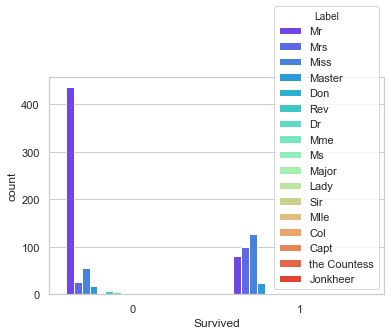

In [85]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Label',data=titanic_train,palette='rainbow')

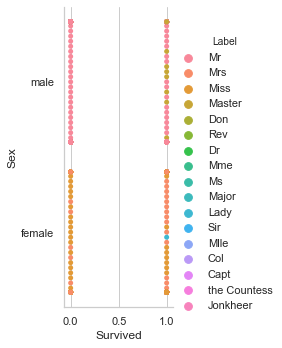

In [90]:
sns.catplot(x="Survived", y="Sex", hue="Label", aspect=.6,
            kind="swarm", data=titanic_train);

In [91]:
titanic_train['Label'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'the Countess',
       'Jonkheer'], dtype=object)

In [98]:
def change_object_dict(obj):
    return { y:x+1 for x,y in enumerate(obj)}

In [99]:
change_object_dict(titanic_train['Label'].unique())

{'Mr': 1,
 'Mrs': 2,
 'Miss': 3,
 'Master': 4,
 'Don': 5,
 'Rev': 6,
 'Dr': 7,
 'Mme': 8,
 'Ms': 9,
 'Major': 10,
 'Lady': 11,
 'Sir': 12,
 'Mlle': 13,
 'Col': 14,
 'Capt': 15,
 'the Countess': 16,
 'Jonkheer': 17}

In [100]:
change_object_dict(titanic_train['Embarked'])

{'S': 889, 'C': 890, 'Q': 891, nan: 830}

In [102]:
titanic_train[titanic_train['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Label,is_child
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,NaN,Miss,0
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,NaN,Mrs,0


In [103]:
titanic_train.dropna(inplace=True)

In [105]:
change_object_dict(titanic_train['Embarked'].unique())

{'S': 1, 'C': 2, 'Q': 3}

In [107]:
titanic_train['Label_Map']=titanic_train['Label'].map(change_object_dict(titanic_train['Label'].unique())).astype(int)

In [109]:
titanic_train['Embarked_Map']=titanic_train['Embarked'].map(change_object_dict(titanic_train['Embarked'].unique())).astype(int)

In [111]:
titanic_train['Male']=titanic_train['Sex'].map(change_object_dict(titanic_train['Sex'].unique())).astype(int)

In [112]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Label,is_child,Label_Map,Embarked_Map,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0,2,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,3,1,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0,2,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,1,1,1


In [114]:
titanic_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 16 columns):
PassengerId     889 non-null int64
Survived        889 non-null int64
Pclass          889 non-null int64
Name            889 non-null object
Sex             889 non-null object
Age             889 non-null float64
SibSp           889 non-null int64
Parch           889 non-null int64
Ticket          889 non-null object
Fare            889 non-null float64
Embarked        889 non-null object
Label           889 non-null object
is_child        889 non-null int64
Label_Map       889 non-null int32
Embarked_Map    889 non-null int32
Male            889 non-null int32
dtypes: float64(2), int32(3), int64(6), object(5)
memory usage: 107.7+ KB


In [115]:
titanic_train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Label', 'is_child', 'Label_Map',
       'Embarked_Map', 'Male'],
      dtype='object')

In [119]:
X=titanic_train[['PassengerId', 'Pclass', 'Age', 'SibSp',
       'Parch',  'Fare','is_child', 'Label_Map',
       'Embarked_Map', 'Male']]
y=titanic_train['Survived']

In [120]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,classification_report

In [121]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [122]:
log_regressor=LogisticRegression()

In [123]:
log_regressor.fit(X_train, y_train)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [124]:
log_y_pred=log_regressor.predict(X_test)

In [125]:
log_y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [129]:
print(classification_report(y_test,log_y_pred,target_names=['Not Survived','Survived']))

              precision    recall  f1-score   support

Not Survived       0.83      0.89      0.86       216
    Survived       0.81      0.72      0.76       140

    accuracy                           0.82       356
   macro avg       0.82      0.81      0.81       356
weighted avg       0.82      0.82      0.82       356



In [127]:
print(confusion_matrix(y_test,log_y_pred))

[[192  24]
 [ 39 101]]


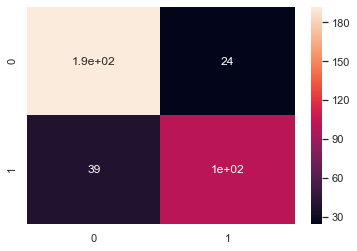

In [128]:
sns.heatmap(data=confusion_matrix(y_test,log_y_pred), annot=True)

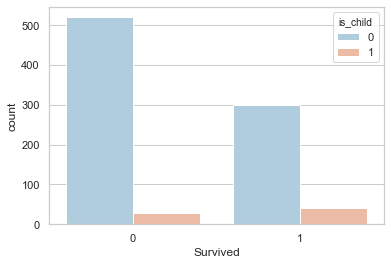

In [131]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='is_child',data=titanic_train,palette='RdBu_r')

In [137]:
import string
string.ascii_letters

'abcdefghijklmnopqrstuvwxyzABCDEFGHIJKLMNOPQRSTUVWXYZ'

In [140]:
stringCase=list(string.ascii_letters)

In [146]:
titanic_train[titanic_train['Ticket'].str.contains(pat = '[a-zA-Z]', regex = True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Label,is_child,Label_Map,Embarked_Map,Male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,Mr,0,1,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,Mrs,0,2,2,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,Miss,0,3,1,2
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,S,Miss,1,3,1,2
12,13,0,3,"Saundercock, Mr. William Henry",male,20.0,0,0,A/5. 2151,8.0500,S,Mr,0,1,1,1
30,31,0,1,"Uruchurtu, Don. Manuel E",male,40.0,0,0,PC 17601,27.7208,C,Don,0,5,2,1
31,32,1,1,"Spencer, Mrs. William Augustus (Marie Eugenie)",female,38.0,1,0,PC 17569,146.5208,C,Mrs,0,2,2,2
33,34,0,2,"Wheadon, Mr. Edward H",male,66.0,0,0,C.A. 24579,10.5000,S,Mr,0,1,1,1
34,35,0,1,"Meyer, Mr. Edgar Joseph",male,28.0,1,0,PC 17604,82.1708,C,Mr,0,1,2,1
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,S,Mr,0,1,1,1


In [147]:
titanic_train[~titanic_train['Ticket'].str.contains(pat = '[a-zA-Z]', regex = True)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Label,is_child,Label_Map,Embarked_Map,Male
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,Mrs,0,2,1,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,Mr,0,1,1,1
5,6,0,3,"Moran, Mr. James",male,25.0,0,0,330877,8.4583,Q,Mr,0,1,3,1
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,S,Mr,0,1,1,1
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,S,Master,1,4,1,1
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,S,Mrs,0,2,1,2
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,C,Mrs,0,2,2,2
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,S,Miss,0,3,1,2
13,14,0,3,"Andersson, Mr. Anders Johan",male,39.0,1,5,347082,31.2750,S,Mr,0,1,1,1
14,15,0,3,"Vestrom, Miss. Hulda Amanda Adolfina",female,14.0,0,0,350406,7.8542,S,Miss,0,3,1,2


In [149]:
titanic_train[titanic_train['Ticket'].str.contains(pat = '[a-zA-Z]', regex = True)].sort_values(by=['Ticket'])

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Label,is_child,Label_Map,Embarked_Map,Male
37,38,0,3,"Cann, Mr. Ernest Charles",male,21.0,0,0,A./5. 2152,8.0500,S,Mr,0,1,1,1
589,590,0,3,"Murdlin, Mr. Joseph",male,25.0,0,0,A./5. 3235,8.0500,S,Mr,0,1,1,1
152,153,0,3,"Meo, Mr. Alfonzo",male,55.5,0,0,A.5. 11206,8.0500,S,Mr,0,1,1,1
488,489,0,3,"Somerton, Mr. Francis William",male,30.0,0,0,A.5. 18509,8.0500,S,Mr,0,1,1,1
494,495,0,3,"Stanley, Mr. Edward Roland",male,21.0,0,0,A/4 45380,8.0500,S,Mr,0,1,1,1
811,812,0,3,"Lester, Mr. James",male,39.0,0,0,A/4 48871,24.1500,S,Mr,0,1,1,1
565,566,0,3,"Davies, Mr. Alfred J",male,24.0,2,0,A/4 48871,24.1500,S,Mr,0,1,1,1
574,575,0,3,"Rush, Mr. Alfred George John",male,16.0,0,0,A/4. 20589,8.0500,S,Mr,0,1,1,1
425,426,0,3,"Wiseman, Mr. Phillippe",male,25.0,0,0,A/4. 34244,7.2500,S,Mr,0,1,1,1
51,52,0,3,"Nosworthy, Mr. Richard Cater",male,21.0,0,0,A/4. 39886,7.8000,S,Mr,0,1,1,1


In [151]:
log_regressor.predict_proba(X_test)[0:20]

array([[0.89713632, 0.10286368],
       [0.87487861, 0.12512139],
       [0.25096416, 0.74903584],
       [0.07253786, 0.92746214],
       [0.8727653 , 0.1272347 ],
       [0.96203804, 0.03796196],
       [0.88519875, 0.11480125],
       [0.77482657, 0.22517343],
       [0.92537423, 0.07462577],
       [0.40703884, 0.59296116],
       [0.19616452, 0.80383548],
       [0.05850653, 0.94149347],
       [0.89730562, 0.10269438],
       [0.46809448, 0.53190552],
       [0.89711324, 0.10288676],
       [0.87996979, 0.12003021],
       [0.06592074, 0.93407926],
       [0.16914837, 0.83085163],
       [0.47165232, 0.52834768],
       [0.90330552, 0.09669448]])

### Decision Tree

#### Lets predict the loan dataset

In [162]:
loan_data=pd.read_csv("..//data/loan_data.csv")

In [163]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [164]:
loan_data.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [165]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


In [166]:
loan_data['credit.policy'].unique()

array([1, 0], dtype=int64)

In [169]:
loan_data.columns

Index(['credit.policy', 'purpose', 'int.rate', 'installment', 'log.annual.inc',
       'dti', 'fico', 'days.with.cr.line', 'revol.bal', 'revol.util',
       'inq.last.6mths', 'delinq.2yrs', 'pub.rec', 'not.fully.paid'],
      dtype='object')

In [170]:
loan_data['purpose'].head()

0    debt_consolidation
1           credit_card
2    debt_consolidation
3    debt_consolidation
4           credit_card
Name: purpose, dtype: object

In [172]:
loan_data['purpose'].unique()

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [179]:
loan_data['purpose'].value_counts()

debt_consolidation    3957
all_other             2331
credit_card           1262
home_improvement       629
small_business         619
major_purchase         437
educational            343
Name: purpose, dtype: int64

Text(0, 0.5, 'Bla')

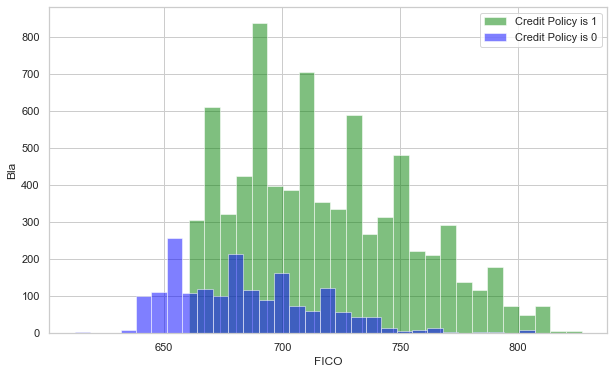

In [182]:
plt.figure(figsize=[10,6])
loan_data[loan_data['credit.policy']==1]['fico'].hist(alpha=0.5,color='green',bins=30,label='Credit Policy is 1')
loan_data[loan_data['credit.policy']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='Credit Policy is 0')

plt.legend()
plt.xlabel('FICO')
plt.ylabel('Bla')

Text(0, 0.5, 'Bla')

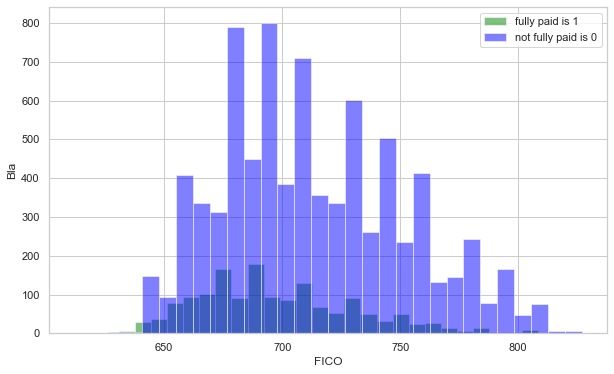

In [183]:
plt.figure(figsize=[10,6])
loan_data[loan_data['not.fully.paid']==1]['fico'].hist(alpha=0.5,color='green',bins=30,label='fully paid is 1')
loan_data[loan_data['not.fully.paid']==0]['fico'].hist(alpha=0.5,color='blue',bins=30,label='not fully paid is 0')

plt.legend()
plt.xlabel('FICO')
plt.ylabel('Bla')

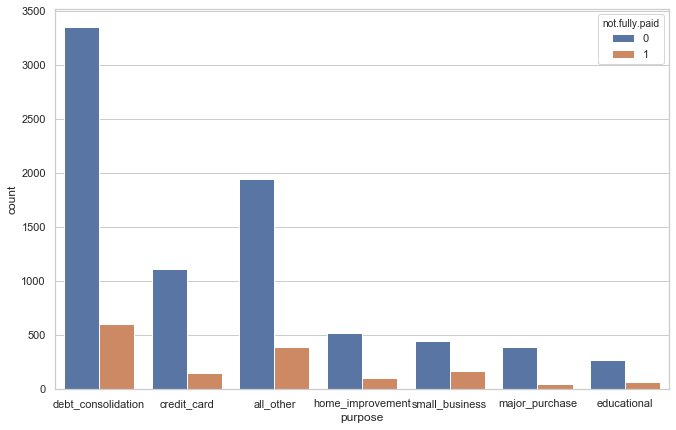

In [185]:
plt.figure(figsize=(11,7))
sns.countplot(x='purpose',hue='not.fully.paid',data=loan_data)

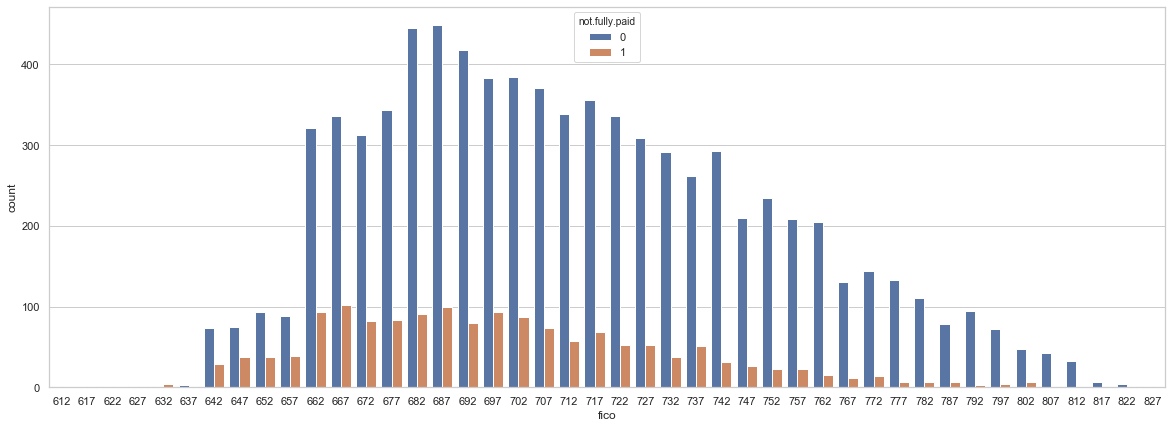

In [190]:
plt.figure(figsize=(20,7))
sns.countplot(x='fico',hue='not.fully.paid',data=loan_data)

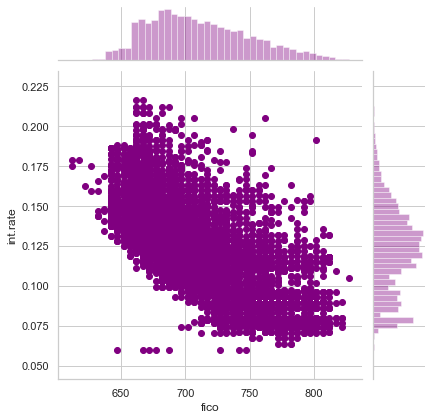

<Figure size 792x504 with 0 Axes>

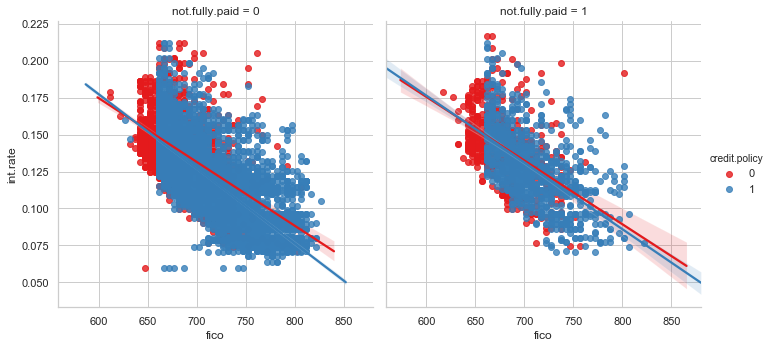

In [193]:
sns.jointplot(x='fico',y='int.rate',data=loan_data,color='purple')
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loan_data,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

In [194]:
def change_object_dict(obj,inc=0):
    return { y:x+inc for x,y in enumerate(obj)}

In [196]:
pd.get_dummies(loan_data,columns=['purpose']).head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_all_other,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,0,1,0,0,0,0,0


In [198]:
map_purpose=loan_data['purpose'].unique(); map_purpose

array(['debt_consolidation', 'credit_card', 'all_other',
       'home_improvement', 'small_business', 'major_purchase',
       'educational'], dtype=object)

In [199]:
change_object_dict(map_purpose,inc=1)

{'debt_consolidation': 1,
 'credit_card': 2,
 'all_other': 3,
 'home_improvement': 4,
 'small_business': 5,
 'major_purchase': 6,
 'educational': 7}

In [201]:
loan_data['purpose_mapping']=loan_data['purpose'].map(change_object_dict(map_purpose,inc=1)).astype(int)

In [202]:
loan_data.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_mapping
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,1
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,2
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,1
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,1
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,2


In [203]:
loan_data.corr()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_mapping
credit.policy,1.000000,-0.294089,0.058770,0.034906,-0.090901,0.348319,0.099026,-0.187518,-0.104095,-0.535511,-0.076318,-0.054243,-0.158119,-0.017331
int.rate,-0.294089,1.000000,0.276140,0.056383,0.220006,-0.714821,-0.124022,0.092527,0.464837,0.202780,0.156079,0.098162,0.159552,-0.061173
installment,0.058770,0.276140,1.000000,0.448102,0.050202,0.086039,0.183297,0.233625,0.081356,-0.010419,-0.004368,-0.032760,0.049955,-0.119683
log.annual.inc,0.034906,0.056383,0.448102,1.000000,-0.054065,0.114576,0.336896,0.372140,0.054881,0.029171,0.029203,0.016506,-0.033439,-0.019800
dti,-0.090901,0.220006,0.050202,-0.054065,1.000000,-0.241191,0.060101,0.188748,0.337109,0.029189,-0.021792,0.006209,0.037362,-0.199278
fico,0.348319,-0.714821,0.086039,0.114576,-0.241191,1.000000,0.263880,-0.015553,-0.541289,-0.185293,-0.216340,-0.147592,-0.149666,0.144098
days.with.cr.line,0.099026,-0.124022,0.183297,0.336896,0.060101,0.263880,1.000000,0.229344,-0.024239,-0.041736,0.081374,0.071826,-0.029237,-0.010047
revol.bal,-0.187518,0.092527,0.233625,0.372140,0.188748,-0.015553,0.229344,1.000000,0.203779,0.022394,-0.033243,-0.031010,0.053699,-0.031574
revol.util,-0.104095,0.464837,0.081356,0.054881,0.337109,-0.541289,-0.024239,0.203779,1.000000,-0.013880,-0.042740,0.066717,0.082088,-0.239537
inq.last.6mths,-0.535511,0.202780,-0.010419,0.029171,0.029189,-0.185293,-0.041736,0.022394,-0.013880,1.000000,0.021245,0.072673,0.149452,0.061419


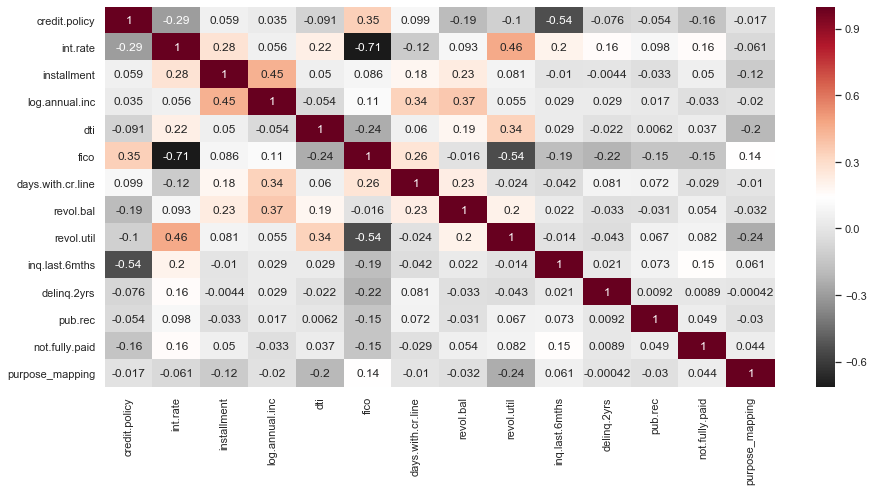

In [244]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,7))
sns.heatmap(data=loan_data.corr(),cmap='RdGy_r',annot=True)

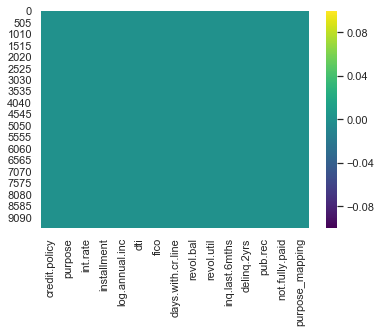

In [210]:
sns.heatmap(data=loan_data.isnull(),cmap='viridis')

### Lets train and test data

In [225]:
X = loan_data.drop(['not.fully.paid','purpose'],axis=1)
y=loan_data['not.fully.paid']

In [226]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

### Lest import Decision tree module.

In [217]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [227]:
DT_loan = DecisionTreeClassifier()

In [228]:
DT_loan.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [229]:
loan_y_pred = DT_loan.predict(X_test)

In [230]:
print(accuracy_score(loan_y_pred,y_test)*100)

73.22546972860125


In [231]:
print(classification_report(loan_y_pred,y_test))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      3103
           1       0.25      0.20      0.23       729

    accuracy                           0.73      3832
   macro avg       0.54      0.53      0.53      3832
weighted avg       0.71      0.73      0.72      3832



In [232]:
print(confusion_matrix(loan_y_pred,y_test))

[[2657  446]
 [ 580  149]]


#### Lets train the RF

In [233]:
from sklearn.ensemble import RandomForestClassifier

In [236]:
RF_loan = RandomForestClassifier(n_estimators=600)

In [237]:
RF_loan.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=600,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [240]:
RF_y_pred = RF_loan.predict(X_test)

In [241]:
print(accuracy_score(RF_y_pred,y_test)*100)

84.42066805845512


In [242]:
print(classification_report(RF_y_pred,y_test))

              precision    recall  f1-score   support

           0       1.00      0.85      0.92      3804
           1       0.02      0.46      0.04        28

    accuracy                           0.84      3832
   macro avg       0.51      0.66      0.48      3832
weighted avg       0.99      0.84      0.91      3832



In [243]:
print(confusion_matrix(RF_y_pred,y_test))

[[3222  582]
 [  15   13]]


### Training Diabates dataset with KNN 

In [245]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os,sys
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

%matplotlib inline

In [246]:
diabates_df=pd.read_csv("../datasets/diabetes.csv")

In [247]:
diabates_df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


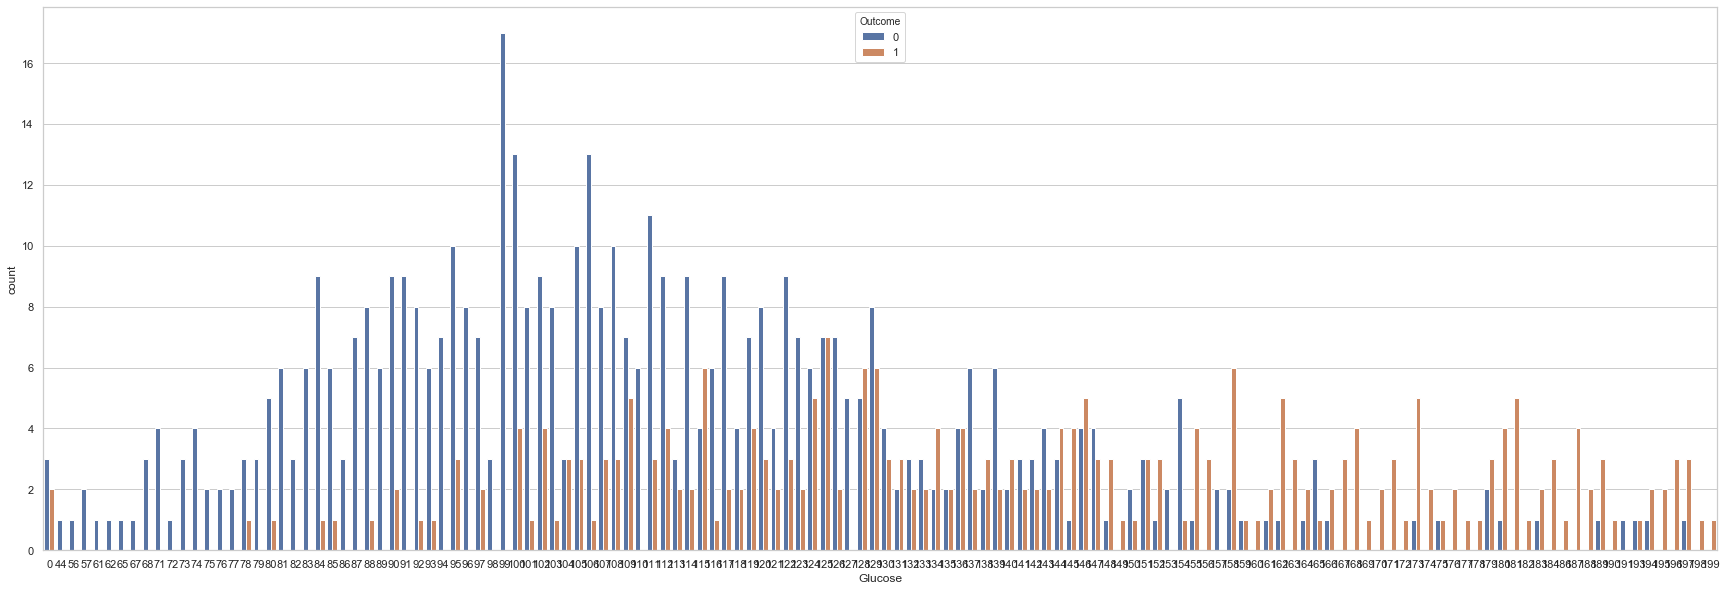

In [253]:
plt.figure(figsize=(30,10))
sns.countplot(x='Glucose',hue='Outcome',data=diabates_df)

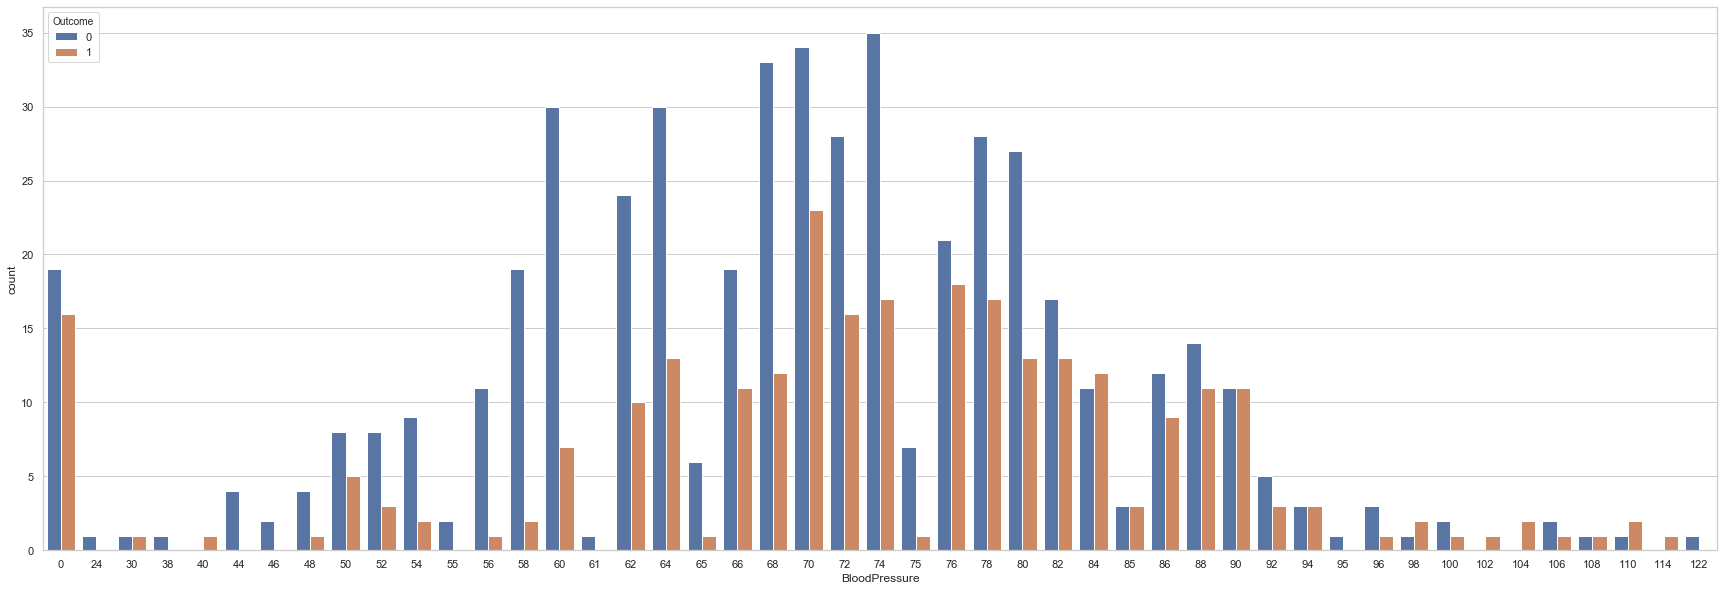

In [255]:
plt.figure(figsize=(30,10))
sns.countplot(x='BloodPressure',hue='Outcome',data=diabates_df)

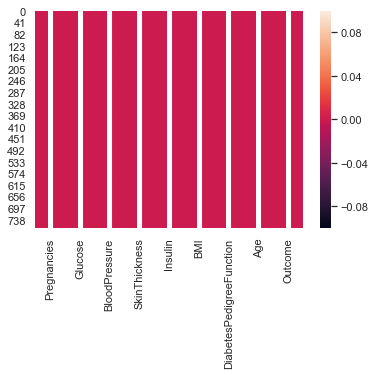

In [257]:
sns.set_style('white')
sns.heatmap(diabates_df.isnull(),annot=True)

In [258]:
diabates_df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [259]:
X=diabates_df.drop(['Outcome'],axis=1)
y=diabates_df['Outcome']

In [260]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [261]:
KNN = KNeighborsClassifier(n_neighbors=11, p=2, metric='euclidean')

In [262]:
KNN.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [263]:
KNN_y_pred = KNN.predict(X_test)

In [266]:
print(accuracy_score(y_test,KNN_y_pred)*100)
print(classification_report(y_test,KNN_y_pred))
print(confusion_matrix(y_test,KNN_y_pred))

73.7012987012987
              precision    recall  f1-score   support

           0       0.79      0.83      0.81       206
           1       0.62      0.54      0.58       102

    accuracy                           0.74       308
   macro avg       0.70      0.69      0.69       308
weighted avg       0.73      0.74      0.73       308

[[172  34]
 [ 47  55]]


In [267]:
from sklearn.preprocessing import StandardScaler

In [268]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [269]:
KNN.fit(X_train,y_train)
KNN_y_pred = KNN.predict(X_test)
print(accuracy_score(y_test,KNN_y_pred)*100)
print(classification_report(y_test,KNN_y_pred))
print(confusion_matrix(y_test,KNN_y_pred))

71.1038961038961
              precision    recall  f1-score   support

           0       0.76      0.83      0.79       206
           1       0.58      0.47      0.52       102

    accuracy                           0.71       308
   macro avg       0.67      0.65      0.66       308
weighted avg       0.70      0.71      0.70       308

[[171  35]
 [ 54  48]]


In [271]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5)
KNN.fit(X_train,y_train)
KNN_y_pred = KNN.predict(X_test)
print(accuracy_score(y_test,KNN_y_pred)*100)
print(classification_report(y_test,KNN_y_pred))
print(confusion_matrix(y_test,KNN_y_pred))

71.61458333333334
              precision    recall  f1-score   support

           0       0.73      0.88      0.80       243
           1       0.68      0.43      0.52       141

    accuracy                           0.72       384
   macro avg       0.70      0.66      0.66       384
weighted avg       0.71      0.72      0.70       384

[[215  28]
 [ 81  60]]


## Support Vector Machine 

In [272]:
from sklearn.svm import SVC
from sklearn.datasets.samples_generator import make_blobs

In [273]:
X,y =make_blobs(n_samples=40,centers=2, random_state=20)

In [277]:
clf = SVC(kernel='linear')
clf.fit(X,y)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

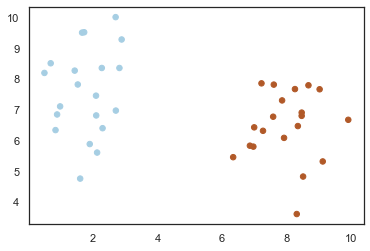

In [279]:
plt.scatter(X[:,0], X[:,1],c=y ,s=30,cmap=plt.cm.Paired)
plt.show()

## Naive Bayes

In [282]:
from sklearn.datasets import fetch_20newsgroups

In [283]:
data=fetch_20newsgroups()

In [284]:
data.keys()

dict_keys(['data', 'filenames', 'target_names', 'target', 'DESCR'])

In [285]:
data.data

["From: lerxst@wam.umd.edu (where's my thing)\nSubject: WHAT car is this!?\nNntp-Posting-Host: rac3.wam.umd.edu\nOrganization: University of Maryland, College Park\nLines: 15\n\n I was wondering if anyone out there could enlighten me on this car I saw\nthe other day. It was a 2-door sports car, looked to be from the late 60s/\nearly 70s. It was called a Bricklin. The doors were really small. In addition,\nthe front bumper was separate from the rest of the body. This is \nall I know. If anyone can tellme a model name, engine specs, years\nof production, where this car is made, history, or whatever info you\nhave on this funky looking car, please e-mail.\n\nThanks,\n- IL\n   ---- brought to you by your neighborhood Lerxst ----\n\n\n\n\n",
 "From: guykuo@carson.u.washington.edu (Guy Kuo)\nSubject: SI Clock Poll - Final Call\nSummary: Final call for SI clock reports\nKeywords: SI,acceleration,clock,upgrade\nArticle-I.D.: shelley.1qvfo9INNc3s\nOrganization: University of Washington\nLines: 